# TUGAS PEMROGRAMAN PENGANTAR AI - Implementasi Genetic Algorithm
Muhamad Rafli Susanto - 1301204052 <br>
Hafian Fathul Madani - 1301204116

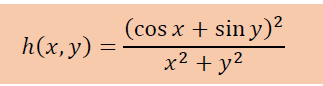

Mencari nilai x dan y dengan genetic algorithm agar fungsi diatas bisa menghasilkan nilai minimum

In [ ]:
# Untuk fungsi math
import math

# Untuk men-randomize
import random

In [ ]:
# Initialize Population
def inisialisasiPopulasi(jumlahKromosom):
  populasi = []
  for kromosom in range(jumlahKromosom):
    populasi.append([random.randrange(0,9) for i in range(6)])
  return populasi

In [ ]:
# Fungsi matematika
def fungsiMath(x, y):
  hasil = ((math.cos(x) + math.sin(y))**2)/((x**2)+(y**2))
  return hasil

In [ ]:
# 1 Kromosom = 6 Gen; n = 3 gen
def repInteger(kromosom, ra, rb, n):
    ''' Men-Decode sebuah representasi Integer ke bilangan Real dengan 
    batas bawah ra, batas atas rb, dan jumlah gen n'''
    # Pecah list kromosom jadi dua untuk x (index 0-2) dan y (index 3-5)
    kromosomListX = [kromosom[i] for i in range(3)]
    kromosomListY = [kromosom[i] for i in range(3, len(kromosom))]

    num = ra-rb
    denum = sum([9*(10**-i) for i in range(1, n+1)])

    # Untuk masukin ke rumus X
    multX = sum([kromosomListX[i-1]*(10**-i) for i in range(1, n+1)])
    # Untuk masukin ke rumus Y
    multY = sum([kromosomListY[i-1]*(10**-i) for i in range(1, n+1)])

    x = rb + ((num/denum) * multX)
    y = rb + ((num/denum) * multY)

    # return [x,y] dalam real
    return [x, y]

In [ ]:
# Fungsi fitness minimasi
def fitnessFunct(decode):
    cek = fungsiMath(decode[0], decode[1])
    # mengecek apakah minimasi(hasil=0) atau tidak
    if cek == 0:
      return 9999999999999999999
    else:
      return 1/cek

In [ ]:
def rouletteWheel(sortedPopulasi, populasi, totalFitness):
    ''' Mengambil pair of parents dari populasi untuk di crossOver (harus beda-beda)
        fungsi untuk memilih orang tua dengan metode roulette wheel
    '''        
    # Menghitung probabilitas terambilnya sebuah kromosom berdasarkan fitnessnya
    # dan langsung memilihnya jika lebih besar dari random.uniform(0, 1)
    idxOrtu = -1
    for kromosom in range(len(sortedPopulasi)):
      if random.uniform(0, 1) <= (sortedPopulasi[kromosom][2]/totalFitness):
        idxOrtu = kromosom
        break
    return populasi[idxOrtu]

def sumFitness(sortedPopulasi):
  # Mencari sum fitness dari populasi untuk dipakai di roulette wheel
  totalFitness = 0
  for i in range(len(sortedPopulasi)):
      totalFitness = totalFitness + sortedPopulasi[i][2]
  return totalFitness

In [ ]:
# Metode Crossover (pilih)
def crossOver(ortuA, ortuB, probCrossOver):
    """
    fungsi untuk melakukan rekombinasi satu titik (1-point crossover) dengan
    probabilitas tertentu
    """
    # probCrossOver = probabilitas crossover
    offSpringA = ortuA
    offSpringB = ortuB
    if random.uniform(0, 1) <= probCrossOver:
      # Generate titik potong
      tiPot = random.randint(1, 5)
      # Crossover
      for i in range(tiPot):
        temp = ortuA[i]
        offSpringA[i] = offSpringB[i]
        offSpringB[i] = temp
    return offSpringA, offSpringB

In [ ]:
# Metode mutasi membalik nilai integer
def mutasiInteger(kromosom, probMutate):
  ''' Mutasi Kromosom dengan Representasi Integer dengan metode membalik nilai integer '''
  # probMutate = probabilitas mutasi
  if random.uniform(0, 1) <= probMutate:
    randomIndex = random.randrange(0, 5)
    kromosom[randomIndex] = 9 - kromosom[randomIndex]
  return kromosom

In [ ]:
# Seleksi survivor; dari parents elite ada 2; sisanya diambil dari populasi anak
def elitism(populasiOrtu):
  ''' Mengambil dua kromosom dengan nilai fitness terbesar dari populasi orang tua yang sudah di sort '''
  # Ambil kromosom nya saja
  return populasiOrtu[0][0], populasiOrtu[1][0]

def seleksiSurvivor(jumlahKromosom, populasiAnak, elite1, elite2):
  ''' Menghasilkan populasi baru untuk generasi berikutnya '''
  populasiBaru = []

  populasiBaru.append(list(elite1))
  populasiBaru.append(list(elite2))

  for kromosom in range(0, jumlahKromosom-2):
    # Ambil kromosom nya saja
    populasiBaru.append(populasiAnak[kromosom])
  return populasiBaru

In [ ]:
def GeneticAlgorithmV1(jumlahGenerasi, jumlahKromosom, probCross, probMutasi, batasBawahXY, batasAtasXY, populasiBaru):
  ''' Procedure genetic algorithm untuk mencari nilai minimum pada fungsiMath(x, y) 
      Procedure ini akan men-generate generasi berdasarkan jumlahGenerasi
  '''
  for generations in range(jumlahGenerasi):
    rankedPopulasi = []
    populasi = []
    for kromosom in populasiBaru:
      # Decode Kromosom
      decode = repInteger(kromosom, batasBawahXY, batasAtasXY, 3)

      # Append ke list rankedPopulasi (ada kromosom, ada hasil decode, dan fitnessnya)
      rankedPopulasi.append([tuple(kromosom), decode, fitnessFunct(decode)])

    # Sort berdasarkan fitness
    rankedPopulasi.sort(key = lambda x: x[2], reverse = True)
    populasi = [tuple(rankedPopulasi[i][0]) for i in range(len(rankedPopulasi))]

    # Ambil elite dari populasi
    eliteA, eliteB = elitism(rankedPopulasi)
    eliteA = tuple(eliteA)
    eliteB = tuple(eliteB)

    # Print solusi terbaik per generasi
    bestCandidate = rankedPopulasi[0]
    print("=== Solusi terbaik di generasi ke-{} ===".format(generations+1))
    print("Kromosom |   {}  |".format(bestCandidate[0]))
    print("X        | {:20}  |".format(bestCandidate[1][0]))
    print("Y        | {:20}  |".format(bestCandidate[1][1]))
    print("Fitness  | {:20}  |".format(bestCandidate[2]))
    print("Hasil    | {:20.15f}  |".format(fungsiMath(bestCandidate[1][0], bestCandidate[1][1])))
    print()


    ''' ================  Making new generation  ================ '''
    populasiBaru = []
    for _ in range((jumlahKromosom-2) // 2):
      offspring = []
      # Pilih Parent -> pilih ortuA dan ortuB dari rankedPopulasi (gabole sama)
      totalFitness = sumFitness(rankedPopulasi)

      a = list(rouletteWheel(rankedPopulasi, populasi, totalFitness))
      b = list(rouletteWheel(rankedPopulasi, populasi, totalFitness))

      while a == b:
        b = list(rouletteWheel(rankedPopulasi, populasi, totalFitness))

      offspring.append(a)
      offspring.append(b)

      # Crossover -> Output 2 kromosom baru [krom1], [krom2]
      offspring[0], offspring[1] = crossOver(offspring[0], offspring[1], probCross)
      
      # Mutasi -> Output masing2 kromosom baru [krom1] dan [krom2]
      offspring[0] = mutasiInteger(offspring[0], probMutasi)
      offspring[1] = mutasiInteger(offspring[1], probMutasi)

      # Menambahkan kromosom yang sudah di crossover dan mutasi ke keturunan baru
      populasiBaru.append(offspring[0])
      populasiBaru.append(offspring[1])

    # Seleksi
    populasiBaru = seleksiSurvivor(jumlahKromosom, populasiBaru, eliteA, eliteB)

In [ ]:
def GeneticAlgorithmV2(fitnessTarget, jumlahKromosom, probCross, probMutasi, batasBawahXY, batasAtasXY, populasiBaru):
  ''' Procedure genetic algorithm untuk mencari nilai minimum pada fungsiMath(x, y) 
      Procedure ini akan men-generate generasi terus menerus sampai fitnessTarget tercapai
  '''
  bestFitness = 0
  n = 0
  while bestFitness < fitnessTarget:
    rankedPopulasi = []
    populasi = []
    n += 1
    for kromosom in populasiBaru:
      # Decode Kromosom
      decode = repInteger(kromosom, batasBawahXY, batasAtasXY, 3)

      # Append ke list rankedPopulasi (ada kromosom, ada hasil decode, dan fitnessnya)
      rankedPopulasi.append([tuple(kromosom), decode, fitnessFunct(decode)])

    # Sort berdasarkan fitness
    rankedPopulasi.sort(key = lambda x: x[2], reverse = True)
    populasi = [tuple(rankedPopulasi[i][0]) for i in range(len(rankedPopulasi))]

    # Ambil elite dari populasi
    eliteA, eliteB = elitism(rankedPopulasi)
    eliteA = tuple(eliteA)
    eliteB = tuple(eliteB)

    # Print solusi terbaik per generasi
    bestCandidate = rankedPopulasi[0]
    bestFitness = bestCandidate[2]
    print("=== Solusi terbaik di generasi ke-{} ===".format(n))
    print("Kromosom |   {}  |".format(bestCandidate[0]))
    print("X        | {:20}  |".format(bestCandidate[1][0]))
    print("Y        | {:20}  |".format(bestCandidate[1][1]))
    print("Fitness  | {:20}  |".format(bestCandidate[2]))
    print("Hasil    | {:20.15f}  |".format(fungsiMath(bestCandidate[1][0], bestCandidate[1][1])))
    print()


    ''' ================  Making new generation  ================ '''
    populasiBaru = []
    for _ in range((jumlahKromosom-2) // 2):
      offspring = []
      # Pilih Parent -> pilih ortuA dan ortuB dari rankedPopulasi (gabole sama)
      totalFitness = sumFitness(rankedPopulasi)

      a = list(rouletteWheel(rankedPopulasi, populasi, totalFitness))
      b = list(rouletteWheel(rankedPopulasi, populasi, totalFitness))

      while a == b:
        b = list(rouletteWheel(rankedPopulasi, populasi, totalFitness))

      offspring.append(a)
      offspring.append(b)

      # Crossover -> Output 2 kromosom baru [krom1], [krom2]
      offspring[0], offspring[1] = crossOver(offspring[0], offspring[1], probCross)
      
      # Mutasi -> Output masing2 kromosom baru [krom1] dan [krom2]
      offspring[0] = mutasiInteger(offspring[0], probMutasi)
      offspring[1] = mutasiInteger(offspring[1], probMutasi)

      # Menambahkan kromosom yang sudah di crossover dan mutasi ke keturunan baru
      populasiBaru.append(offspring[0])
      populasiBaru.append(offspring[1])

    # Seleksi
    populasiBaru = seleksiSurvivor(jumlahKromosom, populasiBaru, eliteA, eliteB)

In [ ]:
# Main GA Program
totalGenerasi = 100
totalKromosom = 100
pc = 1.0
pm = 1.0
batasBawahXY = -5
batasAtasXY = 5
initPopulasi = inisialisasiPopulasi(totalKromosom)

# Berdasarkan total generasi
GeneticAlgorithmV1(totalGenerasi, totalKromosom, pc, pm, batasBawahXY, batasAtasXY, initPopulasi)

# Berdasarkan target fitness
# targetFitness = 999999
# GeneticAlgorithmV2(targetFitness, totalKromosom, pc, pm, batasBawahXY, batasAtasXY, initPopulasi)

=== Solusi terbaik di generasi ke-1 ===
Kromosom |   (8, 1, 1, 3, 5, 0)  |
X        |   -3.118118118118119  |
Y        |    1.496496496496496  |
Fitness  |    1939542.751245777  |
Hasil    |    0.000000515585439  |

=== Solusi terbaik di generasi ke-2 ===
Kromosom |   (1, 9, 3, 3, 5, 0)  |
X        |    3.068068068068068  |
Y        |    1.496496496496496  |
Fitness  |   3555508322.1384125  |
Hasil    |    0.000000000281254  |

=== Solusi terbaik di generasi ke-3 ===
Kromosom |   (1, 9, 3, 3, 5, 0)  |
X        |    3.068068068068068  |
Y        |    1.496496496496496  |
Fitness  |   3555508322.1384125  |
Hasil    |    0.000000000281254  |

=== Solusi terbaik di generasi ke-4 ===
Kromosom |   (1, 9, 3, 3, 5, 0)  |
X        |    3.068068068068068  |
Y        |    1.496496496496496  |
Fitness  |   3555508322.1384125  |
Hasil    |    0.000000000281254  |

=== Solusi terbaik di generasi ke-5 ===
Kromosom |   (1, 9, 3, 3, 5, 0)  |
X        |    3.068068068068068  |
Y        |    1.4964964964